Accuracy: 0.29822301199466905
              precision    recall  f1-score   support

           0       0.18      0.29      0.22      4495
           1       0.32      0.28      0.30      4497
           2       0.00      0.00      0.00      4470
           3       0.76      0.77      0.76      4500
           4       0.17      0.25      0.20      4486
           5       0.20      0.19      0.19      4466
           6       0.31      0.75      0.43      4520
           7       0.29      0.46      0.35      4521
           8       0.00      0.00      0.00      4504
           9       0.00      0.00      0.00      4561

    accuracy                           0.30     45020
   macro avg       0.22      0.30      0.25     45020
weighted avg       0.22      0.30      0.25     45020



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Silhouette Score: 0.3194154328109772


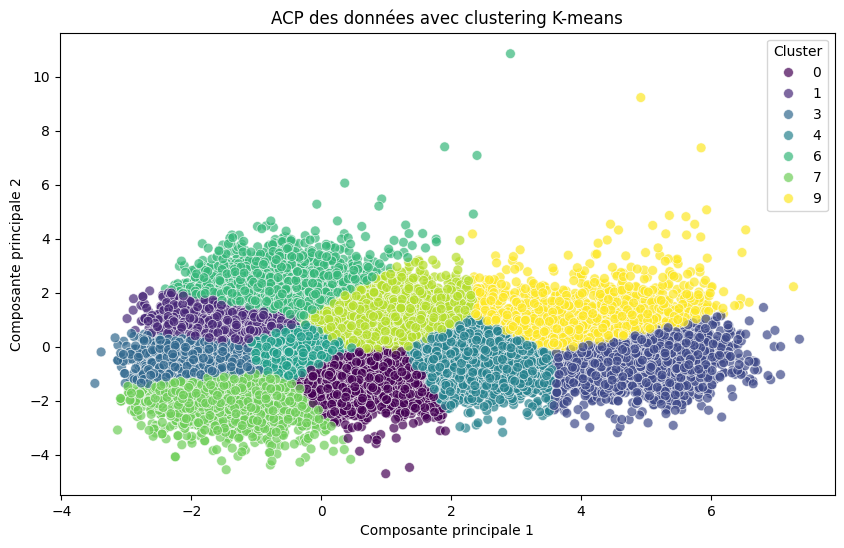

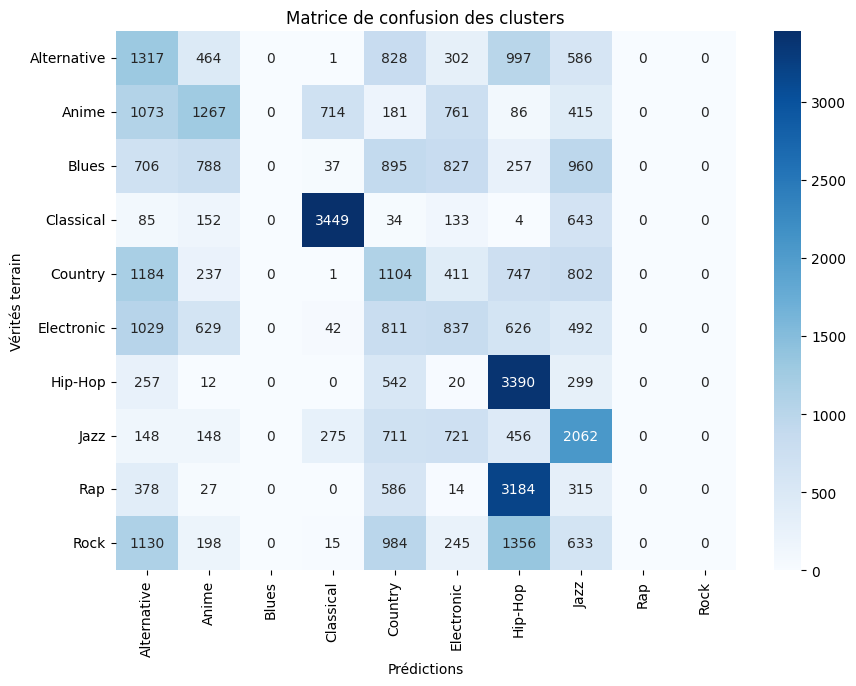

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score, silhouette_score, confusion_matrix

# Charger les données
df = pd.read_csv('data/musicgenre.csv')

# Gérer les valeurs manquantes
df = df.dropna(subset=['music_genre'])
df = df.replace("?", None).dropna()

# Encoder les caractéristiques catégorielles
genre_encoder = LabelEncoder()
key_encoder = LabelEncoder()
mode_encoder = LabelEncoder()

df['music_genre'] = genre_encoder.fit_transform(df['music_genre'])
df['key'] = key_encoder.fit_transform(df['key'])
df['mode'] = mode_encoder.fit_transform(df['mode'])

# Mise à l'échelle des caractéristiques
df["duration_ms"] = df["duration_ms"] / 1000

# Supprimer les colonnes non pertinentes
df.drop(['track_name', 'instance_id', 'obtained_date', 'artist_name'], axis=1, inplace=True)

# Séparer les données en caractéristiques et cible
X = df.drop(columns=['music_genre'])
y = df['music_genre']

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Effectuer une ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Créer des clusters avec K-means
num_genres = len(np.unique(y))
kmeans = KMeans(n_clusters=num_genres, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Définir le genre musical de chaque cluster
cluster_genre = {}
for cluster in np.unique(clusters):
    cluster_genres, counts = np.unique(y[clusters == cluster], return_counts=True)
    majority_genre = cluster_genres[np.argmax(counts)]
    cluster_genre[cluster] = majority_genre

# Prédire les genres musicaux basés sur les clusters
y_pred_cluster = np.array([cluster_genre[c] for c in clusters])

# Afficher les résultats des prédictions basées sur les clusters
accuracy = accuracy_score(y, y_pred_cluster)
print(f'Accuracy: {accuracy}')
print(classification_report(y, y_pred_cluster))

# Vérification de la qualité des clusters
silhouette_avg = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Visualisation des composantes principales avec les clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=50, alpha=0.7)
plt.title('ACP des données avec clustering K-means')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend(title='Cluster')
plt.show()

# Visualisation de la matrice de confusion des clusters
conf_matrix_cluster = confusion_matrix(y, y_pred_cluster)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_cluster, annot=True, fmt="d", cmap="Blues", xticklabels=genre_encoder.classes_, yticklabels=genre_encoder.classes_)
plt.title('Matrice de confusion des clusters')
plt.xlabel('Prédictions')
plt.ylabel('Vérités terrain')
plt.show()
